# Классификация
Один из наболее простых методов классификации - это дискриминантный анализ. 
Зависимая переменная (y) - категориальная \
Независимые переменные (X)- непрерывные \
На основании некоторых признаков (независимых переменных) объект можно причислить к одной из заранее **заданных** групп. \
Обучение с учителем.

#### Дискриминантная функция
$y(x) = w_0 + w_1*x_1 + w_2*x_2 + ... + w_n*x_n = w_0 + w^Tx$ 

Задача - найти вектор $w$ и скаляр $w_0$, чтобы функция с максимальной точностью разделяла группы. \
Метод решения - линейный дискриминантный анализ (LDA - Linear Discriminant Analysis)

Геометрический смысл дискриминантной функции. \
Рассмотрим на примере двух классов (красные и синие). \
Есть набор элементов. Провести такую прямую, на которую далее проецируем все точки. По сути перемещаем в одномерную плоскость. Далее проводим перепендикляр к этой прямой таким образом, чтобы отделить наши два класса. Вот этот перепендикуляр - это и есть решение.

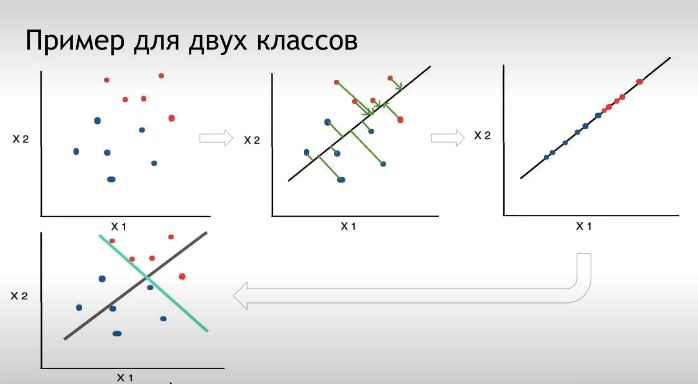

Метод для решения - критерий Фишера. \
Найти центры групп $x^{(1)}$ и $x^{(2)}$ синих и красных точек (аналогия - центр масс). \
Расстояние между этими точками - должно быть максимальным.\
Если начнем проецировать на нормаль точки, то можем увидеть нахлест (см. гистограмму) - разброс прокций $s$. \
Критерий Фишера $J(w)$. Задача состоит в том, чтобы "поворачивая" нормаль, найти такое положение при котором будет максимально возможное расстояние при минимальном разбросе при проецировании.

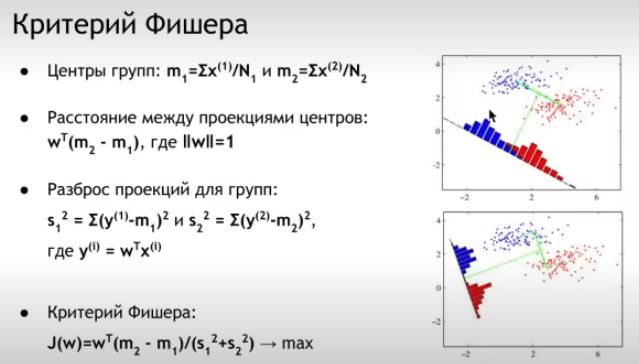

Если классов больше двух, то количество дискр. функций становится равным количеству классов. Точка х будет относиться к той группе, для которой соответсвующия диск. функция имеет наибольшее значение.

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style()

import numpy as np

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
X, y = make_blobs(n_samples=1000, centers=3, cluster_std=2)

In [4]:
X[:, 0] *= 1000

<AxesSubplot:>

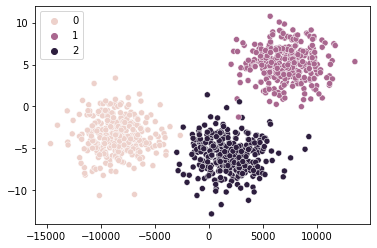

In [7]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [12]:
X_train

array([[ 9.76206868e+03,  5.40785062e+00],
       [ 2.61122147e+02, -4.97030348e+00],
       [ 2.72222550e+03, -8.32245169e+00],
       ...,
       [-2.30292664e+03, -8.10385581e+00],
       [-8.21902545e+03, -4.00392706e+00],
       [-1.00128452e+04, -5.07981747e+00]])

<AxesSubplot:>

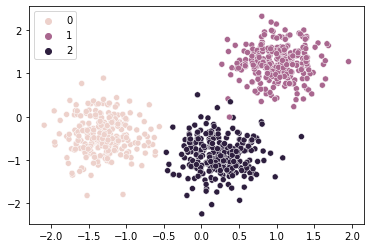

In [19]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)

In [17]:
X_train.mean(axis=0)

array([-2.35922393e-17,  5.73152636e-17])

In [18]:
X_train.std(axis=0)

array([1., 1.])

In [ ]:
# (x - x.mean(axis=0)) / x.std(axis=0)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [24]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [25]:
lda.score(X_test, y_test)

0.995

In [26]:
y_ = lda.predict(X_test)

In [27]:
y_

array([0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 1, 2, 0, 0, 1, 1,
       2, 1, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 0,
       0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 0, 1, 2, 0, 1,
       1, 1, 2, 0, 0, 1, 0, 1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1, 1,
       0, 2, 2, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 0, 0, 1, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 1, 1, 1, 2, 0,
       1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 2, 0, 0, 2, 2, 1, 2, 0, 2, 2, 1, 2,
       1, 0])

In [28]:
y_test

array([0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 1, 2, 0, 0, 1, 1,
       2, 1, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 0,
       0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 0, 1, 2, 0, 1,
       1, 1, 2, 0, 0, 1, 0, 1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1, 1,
       0, 2, 2, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 0, 0, 1, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 2, 0, 0, 2, 2, 1, 2, 0, 2, 2, 1, 2,
       1, 0])

In [53]:
lda.__dict__

{'solver': 'svd',
 'shrinkage': None,
 'priors': None,
 'n_components': None,
 'store_covariance': False,
 'tol': 0.0001,
 'covariance_estimator': None,
 'n_features_in_': 2,
 'classes_': array([0, 1, 2]),
 'priors_': array([0.32375, 0.34625, 0.33   ]),
 '_max_components': 2,
 'means_': array([[-1.30370283, -0.43237192],
        [ 1.00836243,  1.23815064],
        [ 0.22099485, -0.87493712]]),
 'xbar_': array([ 1.24900090e-16, -5.55111512e-17]),
 'explained_variance_ratio_': array([0.83810583, 0.16189417]),
 'scalings_': array([[ 3.03811693,  1.72848211],
        [ 1.21647402, -2.21491092]]),
 'intercept_': array([-12.03283923, -12.00113521,  -3.87681238]),
 'coef_': array([[-15.87103543,  -2.58804338],
        [ 12.15574269,   7.77263072],
        [  2.81612671,  -5.6163465 ]])}

In [ ]:
'intercept_': array([-12.03283923, -12.00113521,  -3.87681238]),
 'coef_': array([[-15.87103543,  -2.58804338],
        [ 12.15574269,   7.77263072],
        [  2.81612671,  -5.6163465 ]])}

In [ ]:
# fi(x) = -12.03283923 - 15.87103543 * x_i1 - 2.58804338 * x_i2
# f1(x) = f2(x)
# f2(x) = f3(x)
# f1(x) = f3(x)

/tmp/ipykernel_2800399/1365378091.py:11: UserWarning: The following kwargs were not used by contour: 'cm'
  plt.contourf(xx, yy, zz, cm=plt.cm.coolwarm, alpha=0.05)


<AxesSubplot:>

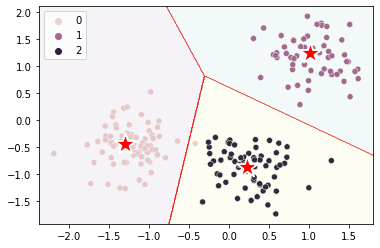

In [58]:
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test)

x1, x2 = plt.xlim()
y1, y2 = plt.ylim()

N = 500

xx, yy = np.meshgrid(np.linspace(x1, x2, N), np.linspace(y1, y2, N))
zz = lda.predict(np.vstack([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)

plt.contourf(xx, yy, zz, cm=plt.cm.coolwarm, alpha=0.05)
plt.contour(xx, yy, zz, colors='r', linewidths=0.2)

C = lda.means_
sns.scatterplot(x=C[:, 0], y=C[:, 1], color='r', marker='*', s=500)

In [41]:
zz

array([0, 0, 0, ..., 1, 1, 1])